<a href="https://colab.research.google.com/github/skardec/deeply_kardec/blob/main/strong_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset do scikit-learn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# ==============================================
# 1. Carregar e preparar dataset
# ==============================================
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Normalizar features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [4]:
# ==============================================
# 2. Definir modelo de regressão
# ==============================================
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=[X.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1)  # saída contínua
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",                # erro quadrático médio
    metrics=["mae", "mse"]     # erro absoluto médio + MSE
)

model.summary()

# ==============================================
# 3. Treinamento
# ==============================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.8740 - mae: 1.2395 - mse: 2.8740 - val_loss: 0.6772 - val_mae: 0.5887 - val_mse: 0.6772
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8475 - mae: 0.6522 - mse: 0.8475 - val_loss: 0.5175 - val_mae: 0.5011 - val_mse: 0.5175
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6688 - mae: 0.5823 - mse: 0.6688 - val_loss: 0.4448 - val_mae: 0.4684 - val_mse: 0.4448
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5805 - mae: 0.5470 - mse: 0.5805 - val_loss: 0.4215 - val_mae: 0.4579 - val_mse: 0.4215
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5345 - mae: 0.5213 - mse: 0.5345 - val_loss: 0.4067 - val_mae: 0.4450 - val_mse: 0.4067
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5322 - mae: 0.5114 - mse: 0.5322 - val_loss: 0.4085 - val_mae: 0.4395 - val_mse: 0.4085
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5036 - mae: 0.5043 - mse: 0.503

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.8903 - mae: 1.2616 - mse: 2.8903 - val_loss: 0.6793 - val_mae: 0.5888 - val_mse: 0.6793
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8138 - mae: 0.6473 - mse: 0.8138 - val_loss: 0.5028 - val_mae: 0.4967 - val_mse: 0.5028
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6762 - mae: 0.5859 - mse: 0.6762 - val_loss: 0.4463 - val_mae: 0.4685 - val_mse: 0.4463
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5927 - mae: 0.5552 - mse: 0.5927 - val_loss: 0.4232 - val_mae: 0.4568 - val_mse: 0.4232
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5658 - mae: 0.5341 - mse: 0.5658 - val_loss: 0.4264 - val_mae: 0.4499 - val_mse: 0.4264
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5264 - mae: 0.5199 - mse: 0.5264 - val_loss: 0.4100 - val_mae: 0.4449 - val_mse: 0.4100
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5259 - mae: 0.5137 - mse: 0.525

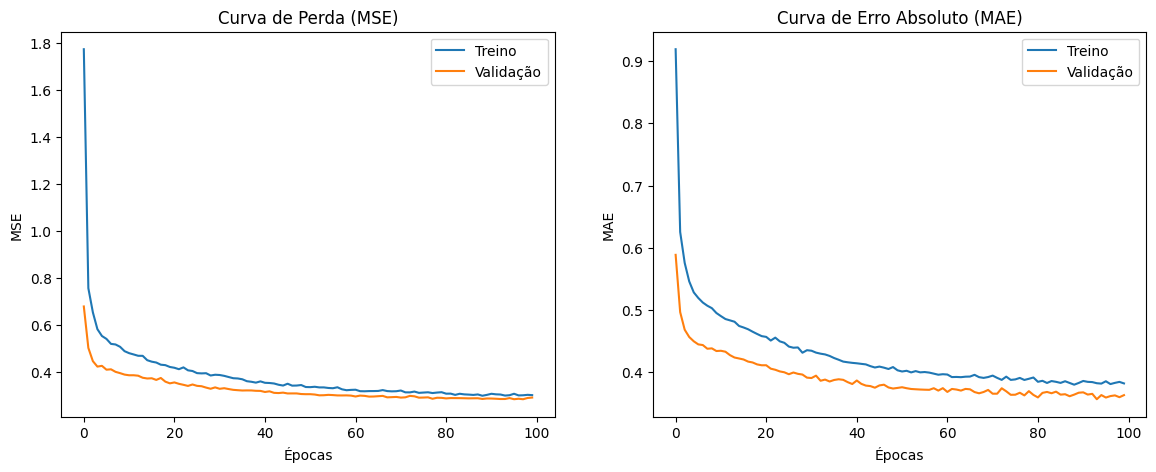

In [2]:





# ==============================================
# 4. Avaliação final
# ==============================================
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"\nDesempenho no teste:")
print(f"MAE = {test_mae:.4f}")
print(f"MSE = {test_mse:.4f}")

# ==============================================
# 5. Gráficos de aprendizado
# ==============================================
# Função auxiliar para plotar curvas
def plot_learning_curves(history):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Perda (MSE)
    axs[0].plot(history.history["loss"], label="Treino")
    axs[0].plot(history.history["val_loss"], label="Validação")
    axs[0].set_title("Curva de Perda (MSE)")
    axs[0].set_xlabel("Épocas")
    axs[0].set_ylabel("MSE")
    axs[0].legend()

    # Erro absoluto (MAE)
    axs[1].plot(history.history["mae"], label="Treino")
    axs[1].plot(history.history["val_mae"], label="Validação")
    axs[1].set_title("Curva de Erro Absoluto (MAE)")
    axs[1].set_xlabel("Épocas")
    axs[1].set_ylabel("MAE")
    axs[1].legend()

    plt.show()

plot_learning_curves(history)


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# ==============================================
# 6. Avaliação detalhada no teste
# ==============================================
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("\nMétricas adicionais no conjunto de teste:")
print(f"MAE   = {mae:.4f}")
print(f"MSE   = {mse:.4f}")
print(f"RMSE  = {rmse:.4f}")
print(f"R²    = {r2:.4f}")
print(f"MAPE  = {mape:.4f}")


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step

Métricas adicionais no conjunto de teste:
MAE   = 0.3450
MSE   = 0.2478
RMSE  = 0.4978
R²    = 0.8126
MAPE  = 0.1992


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.9544 - mae: 1.2962 - mse: 2.9544 - val_loss: 0.7576 - val_mae: 0.6283 - val_mse: 0.7576
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8919 - mae: 0.6730 - mse: 0.8919 - val_loss: 0.5303 - val_mae: 0.5209 - val_mse: 0.5303
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7095 - mae: 0.5930 - mse: 0.7095 - val_loss: 0.4535 - val_mae: 0.4735 - val_mse: 0.4535
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6206 - mae: 0.5535 - mse: 0.6206 - val_loss: 0.4355 - val_mae: 0.4600 - val_mse: 0.4355
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5521 - mae: 0.5287 - mse: 0.5521 - val_loss: 0.4215 - val_mae: 0.4553 - val_mse: 0.4215
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5451 - mae: 0.5273 - mse: 0.5451 - val_loss: 0.4078 - val_mae: 0.4479 - val_mse: 0.4078
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5472 - mae: 0.5166 - mse: 0.5472 - val_los

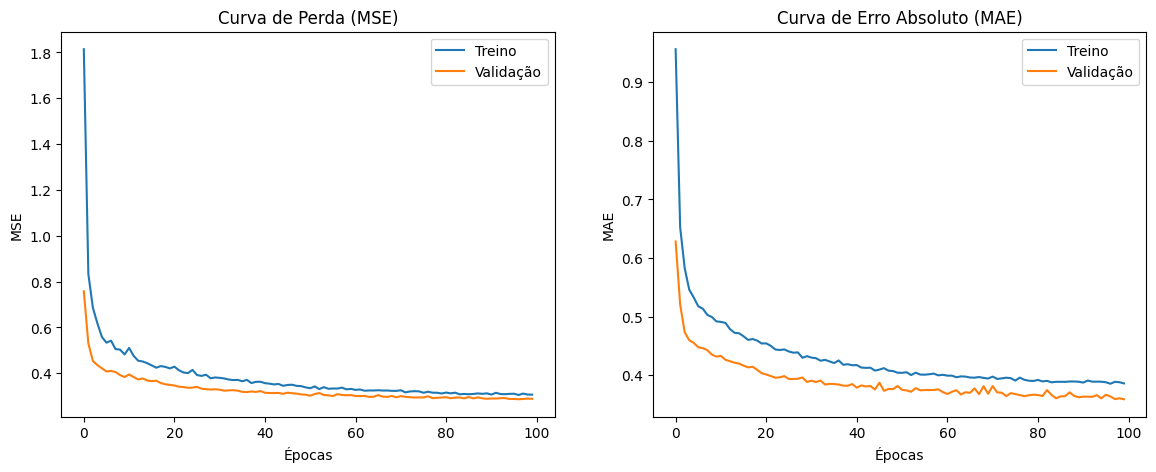

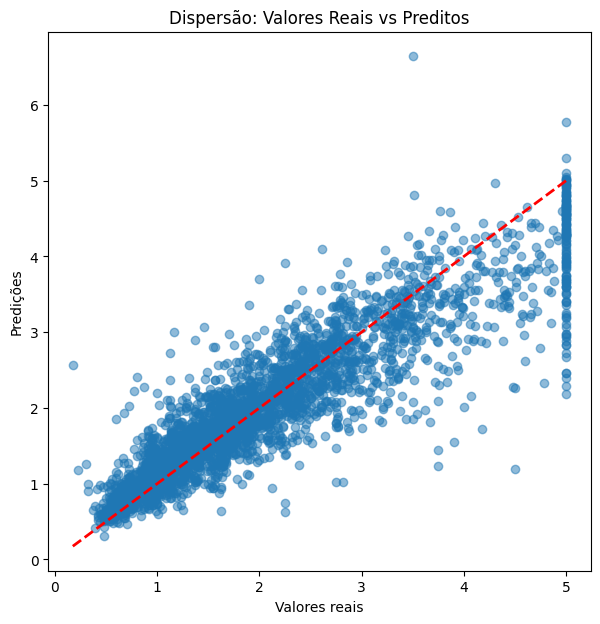

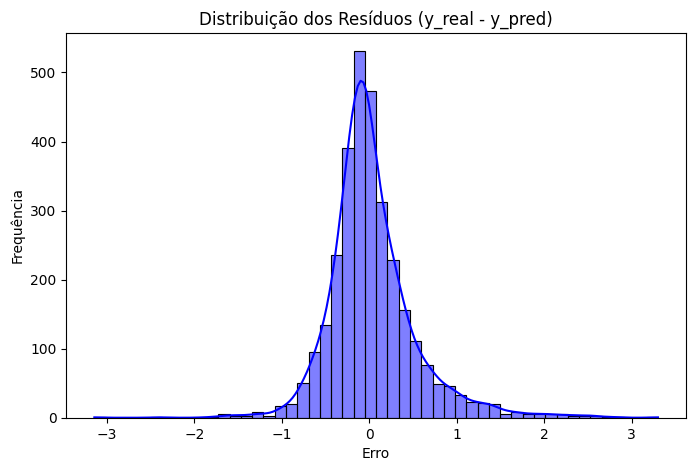

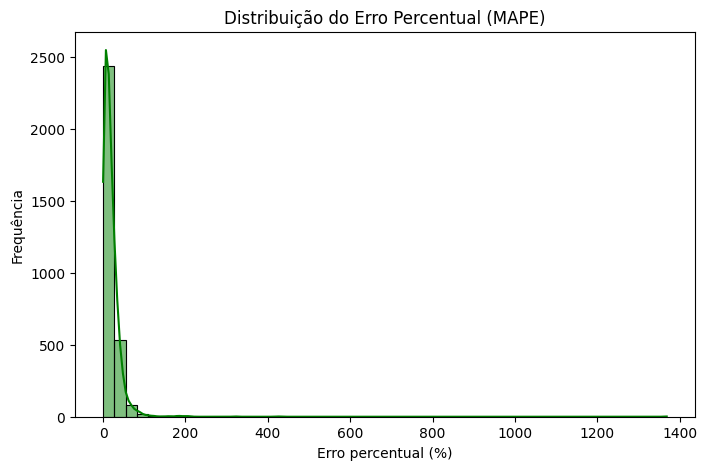

/tmp/ipython-input-2906169937.py:124: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuos, shade=True, color="purple")


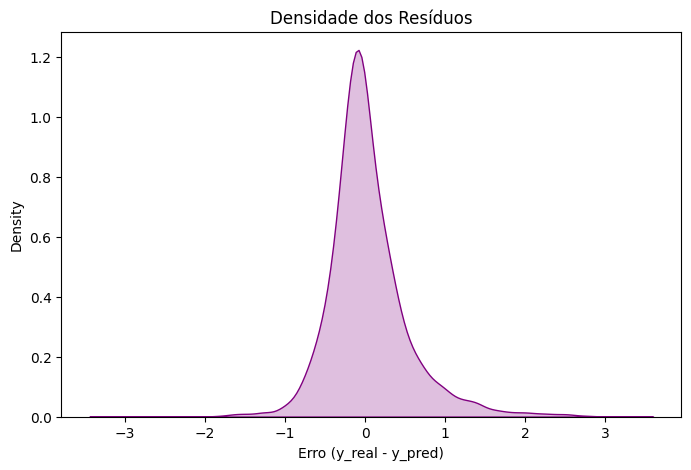

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset do scikit-learn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ==============================================
# 1. Carregar e preparar dataset
# ==============================================
housing = fetch_california_housing()
X, y = housing.data, housing.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ==============================================
# 2. Modelo
# ==============================================
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=[X.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae", "mse"]
)

# ==============================================
# 3. Treinamento
# ==============================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=128,
    verbose=1
)

# ==============================================
# 4. Avaliação no teste
# ==============================================
y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("\nMétricas no conjunto de teste:")
print(f"MAE   = {mae:.4f}")
print(f"MSE   = {mse:.4f}")
print(f"RMSE  = {rmse:.4f}")
print(f"R²    = {r2:.4f}")
print(f"MAPE  = {mape:.4f}")

# ==============================================
# 5. Gráficos
# ==============================================

# 5.1 Curvas de aprendizado
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(history.history["loss"], label="Treino")
axs[0].plot(history.history["val_loss"], label="Validação")
axs[0].set_title("Curva de Perda (MSE)")
axs[0].set_xlabel("Épocas")
axs[0].set_ylabel("MSE")
axs[0].legend()

axs[1].plot(history.history["mae"], label="Treino")
axs[1].plot(history.history["val_mae"], label="Validação")
axs[1].set_title("Curva de Erro Absoluto (MAE)")
axs[1].set_xlabel("Épocas")
axs[1].set_ylabel("MAE")
axs[1].legend()
plt.show()

# 5.2 Dispersão y_true vs y_pred
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores reais")
plt.ylabel("Predições")
plt.title("Dispersão: Valores Reais vs Preditos")
plt.show()

# 5.3 Distribuição dos resíduos
residuos = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuos, bins=50, kde=True, color="blue")
plt.title("Distribuição dos Resíduos (y_real - y_pred)")
plt.xlabel("Erro")
plt.ylabel("Frequência")
plt.show()

# 5.4 Histograma dos erros percentuais
erros_percentuais = 100 * np.abs(residuos / y_test)
plt.figure(figsize=(8, 5))
sns.histplot(erros_percentuais, bins=50, kde=True, color="green")
plt.title("Distribuição do Erro Percentual (MAPE)")
plt.xlabel("Erro percentual (%)")
plt.ylabel("Frequência")
plt.show()

# 5.5 Curva de densidade dos resíduos
plt.figure(figsize=(8, 5))
sns.kdeplot(residuos, shade=True, color="purple")
plt.title("Densidade dos Resíduos")
plt.xlabel("Erro (y_real - y_pred)")
plt.show()
